<a href="https://colab.research.google.com/github/Jitendra4Jalwaniya/tf_learning/blob/main/random/image_embedding_and_similarity_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-hj_yq2bp
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-hj_yq2bp
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.8 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=edb1bdd2d96f119e5b71bedc32ef69633ed6ad451cb4e1b9e06d7d8ae8f10af2
  Stored in directory: /tmp/pip-ephem-wheel-cache-z0goj14k/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [56]:
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import os
import clip
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from scipy.spatial.distance import euclidean

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Load pre-trained model
model = models.resnet50(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [59]:
# Remove the final classification layer
model = torch.nn.Sequential(*list(model.children())[:-1])

# Preprocess the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

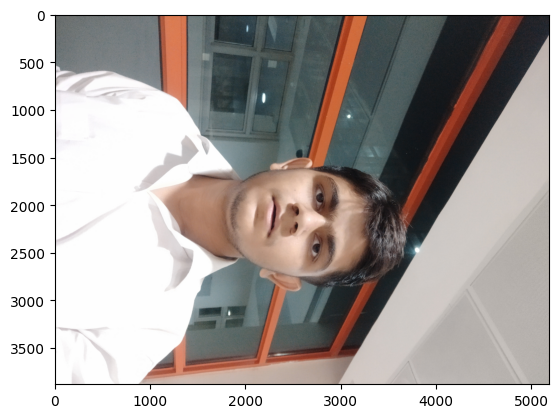

In [60]:
os.chdir('/content/drive/My Drive/personal details')
img = plt.imread('photo1.jpg')
plt.imshow(img)

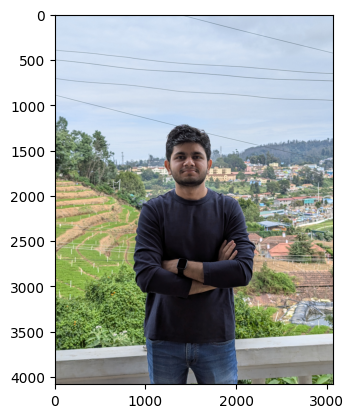

In [61]:
os.chdir('/content/drive/My Drive/Ooty')
img = plt.imread('PXL_20241003_041738463.MP.jpg')
plt.imshow(img)

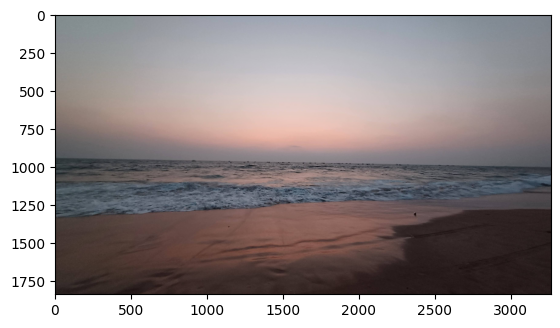

In [62]:
os.chdir('/content/drive/My Drive/Goa trip')
img = plt.imread('20230317_190237.jpg')
plt.imshow(img)

In [51]:
os.chdir('/content/drive/My Drive/personal details')
my_img1 = Image.open("photo1.jpg").convert("RGB")
input_tensor1 = transform(my_img1).unsqueeze(0)

# Extract embeddings
with torch.no_grad():
    embedding1 = model(input_tensor1).squeeze()

os.chdir('/content/drive/My Drive/Ooty')
my_img2 = Image.open("PXL_20241003_041738463.MP.jpg").convert("RGB")
input_tensor2 = transform(my_img2).unsqueeze(0)

# Extract embeddings
with torch.no_grad():
    embedding2 = model(input_tensor2).squeeze()

os.chdir('/content/drive/My Drive/Goa trip')
my_img3 = Image.open("20230317_190237.jpg").convert("RGB")
input_tensor3 = transform(my_img3).unsqueeze(0)

# Extract embeddings
with torch.no_grad():
    embedding3 = model(input_tensor3).squeeze()

print(embedding1)
print(embedding2)
print(embedding3)

tensor([0.3726, 0.5898, 0.4448,  ..., 0.2898, 0.4338, 0.3728])
tensor([0.3647, 0.5636, 0.5417,  ..., 0.3385, 0.4935, 0.3187])
tensor([0.3611, 0.5143, 0.4978,  ..., 0.2930, 0.4696, 0.3614])


In [52]:
cosine_similarity12 = 1 - cosine(embedding1, embedding2)
cosine_similarity13 = 1 - cosine(embedding1, embedding3)
print("Cosine Similarity:", cosine_similarity12, cosine_similarity13)

Cosine Similarity: 0.9948133998114379 0.9952382458046826


In [53]:
euclidean_distance12 = euclidean(embedding1, embedding2)
euclidean_distance13 = euclidean(embedding1, embedding3)
print("Euclidean Distance:", euclidean_distance12, euclidean_distance13)

Euclidean Distance: 2.1617374420166016 2.0712263584136963
